In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
from scipy import stats
from scipy.stats import pearsonr

from sklearn.cluster import KMeans

%matplotlib notebook

In [2]:
sdssDF = pd.read_csv('FullGalaxyTable.csv')
galaxy_num = sdssDF.shape[0]
sdssDF = sdssDF.sample(int(sdssDF.shape[0] * 0.01)) #1% of set, higher sample size when we have access to TACC
sample_galaxy_num = sdssDF.shape[0]
sdssDF

,objID,ra,dec,z
1569835,1237668599390277440,256.367609,-10.605435,20.05046
1751621,1237665108121159076,257.670135,13.070178,19.89684
3559727,1237668568787584461,246.911602,-4.587218,20.20787
3168066,1237665231063023779,252.374763,14.721550,23.07053
879263,1237656234715316527,280.949868,1.074913,18.93596
...,...,...,...,...
2968795,1237648673460061871,247.704546,-0.448826,20.72408
3404630,1237668628921584385,248.893610,-9.847057,22.41188
4868960,1237662237492510753,244.858723,4.880963,21.55074
4615612,1237654948392010945,263.362268,24.358163,19.44419


In [3]:
ra = tuple(sdssDF['ra'])
dec = tuple(sdssDF['dec'])
redshift = tuple(sdssDF['z'])

<IPython.core.display.Javascript object>


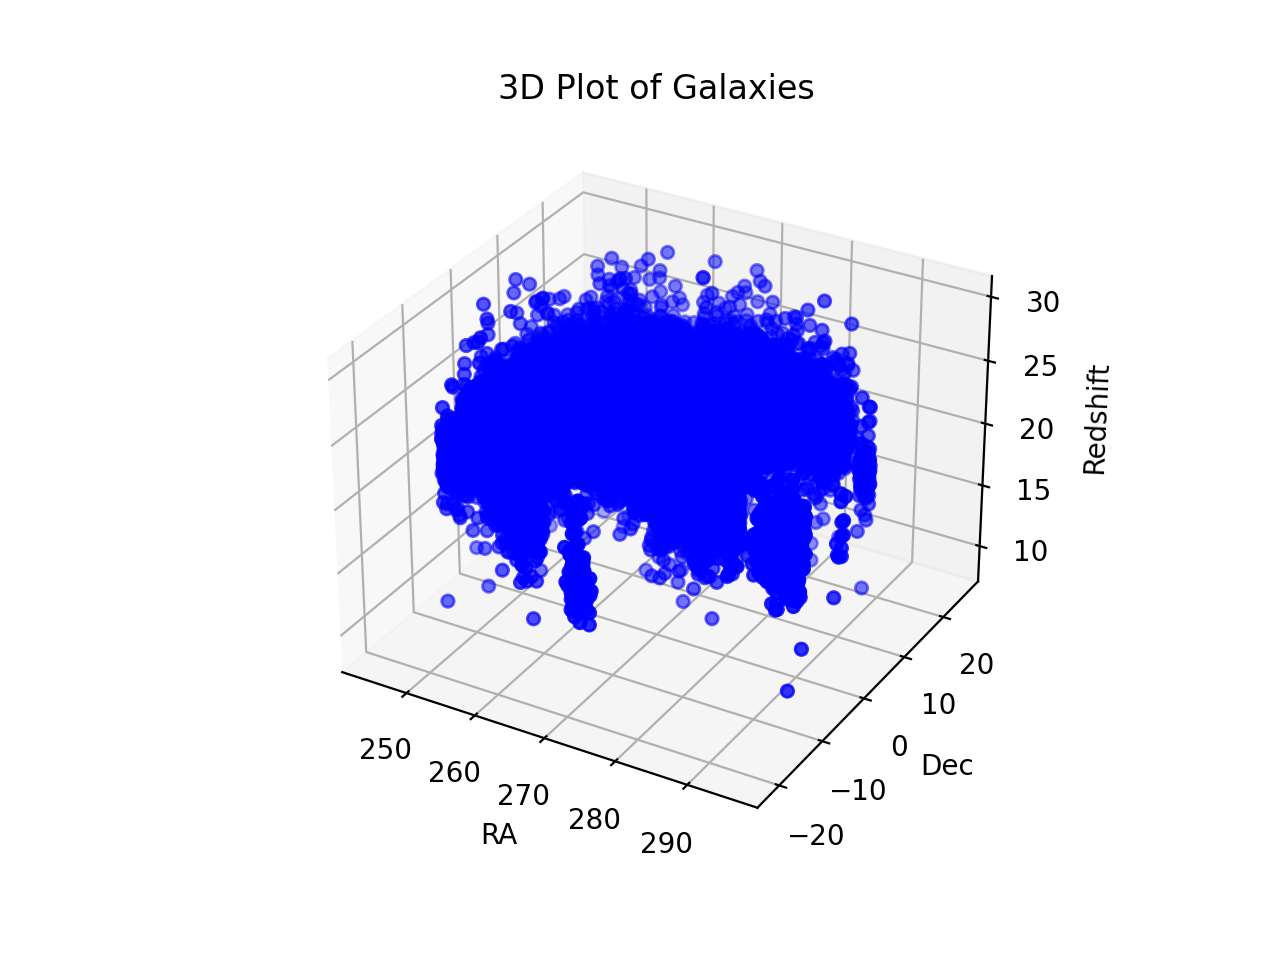

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ra, dec, redshift, c='b', marker='o')

ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.set_zlabel('Redshift')

ax.set_title('3D Plot of Galaxies')

plt.show()

<IPython.core.display.Javascript object>


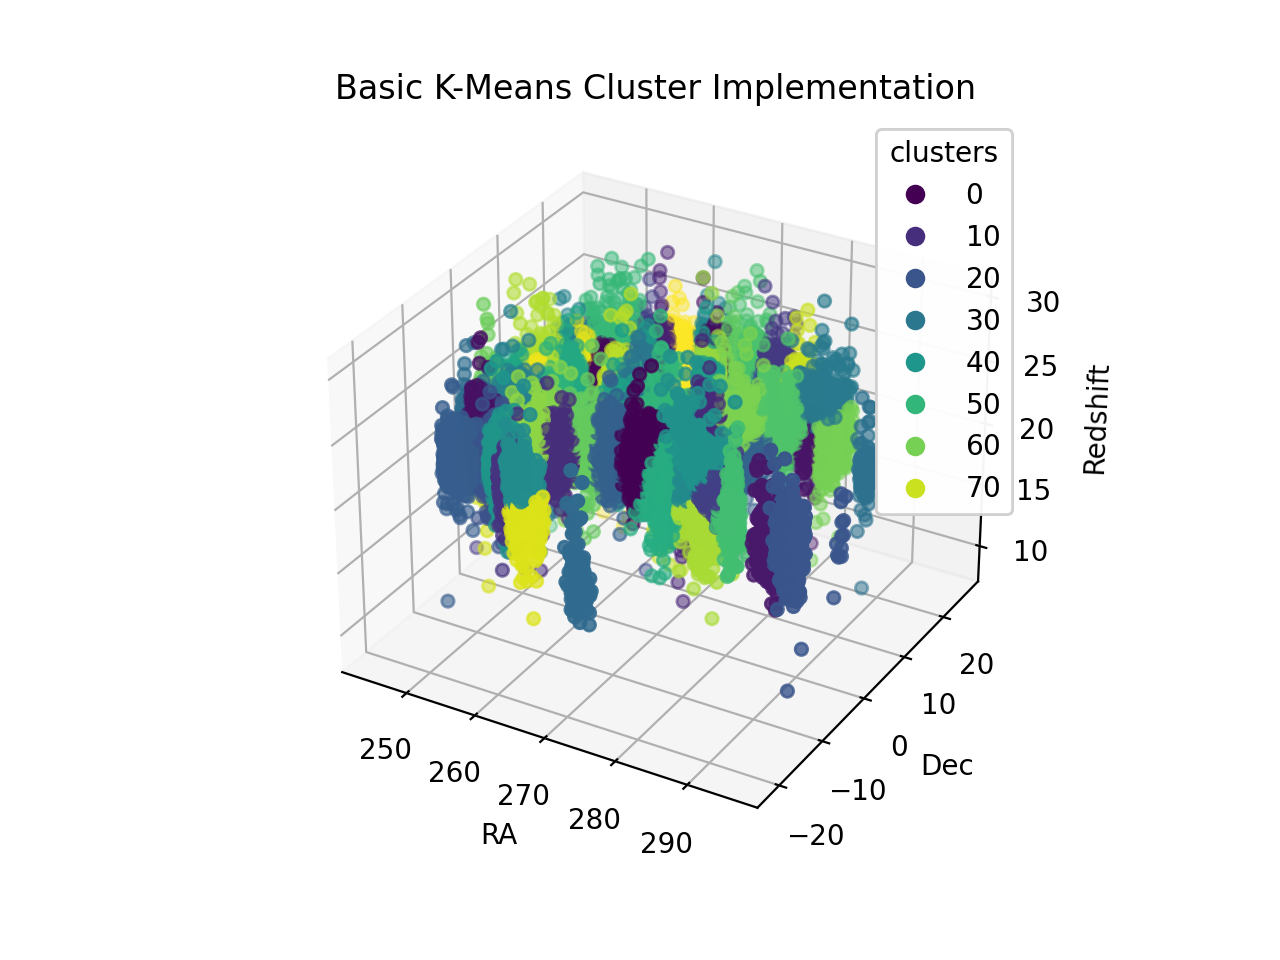

/Users/srivi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


NUM CLUSTERS: 77


In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

data = np.vstack((ra, redshift, dec)).T

num_clusters = random.randint(20, 100)

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)
labels = kmeans.labels_

scatter = ax.scatter(ra, dec, redshift, c=labels)

legend1 = ax.legend(*scatter.legend_elements(), title="clusters")
ax.add_artist(legend1)

ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.set_zlabel('Redshift')

ax.set_title('Basic K-Means Cluster Implementation')

print("NUM CLUSTERS: " + str(num_clusters))

plt.show()

In [6]:
sdssDF['cluster'] = labels
clusters = kmeans.cluster_centers_
clustersDF = pd.DataFrame(clusters, columns=['ra', 'dec', 'redshift'])
clustersDF = clustersDF[['ra', 'dec', 'redshift']]
clustersDF

,ra,dec,redshift
0,267.751155,20.823636,-0.068565
1,254.958903,21.019091,12.037260
2,264.521898,21.137486,21.525781
3,249.216839,21.637633,-6.542033
4,280.025119,18.960186,19.566686
...,...,...,...
72,259.941842,18.818360,-13.361872
73,252.001968,21.172444,12.560321
74,249.023525,21.097049,5.522836
75,253.921741,17.076919,17.500432


<IPython.core.display.Javascript object>


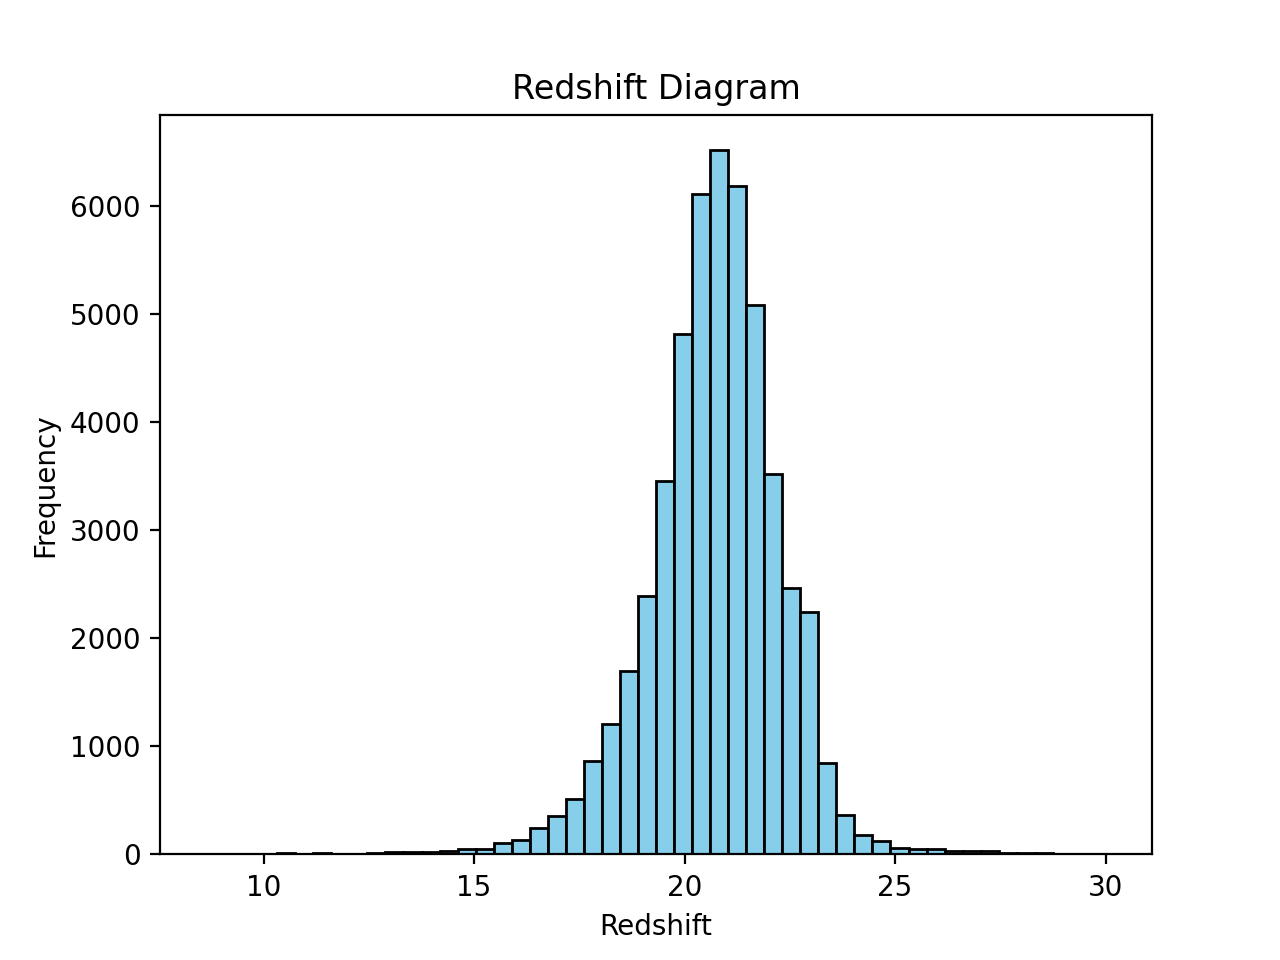

In [7]:
plt.figure()

num_bins = 50

plt.hist(sdssDF['z'], bins=num_bins, color='skyblue', edgecolor='black')

plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.title('Redshift Diagram')

# Show the plot
plt.show()

<IPython.core.display.Javascript object>


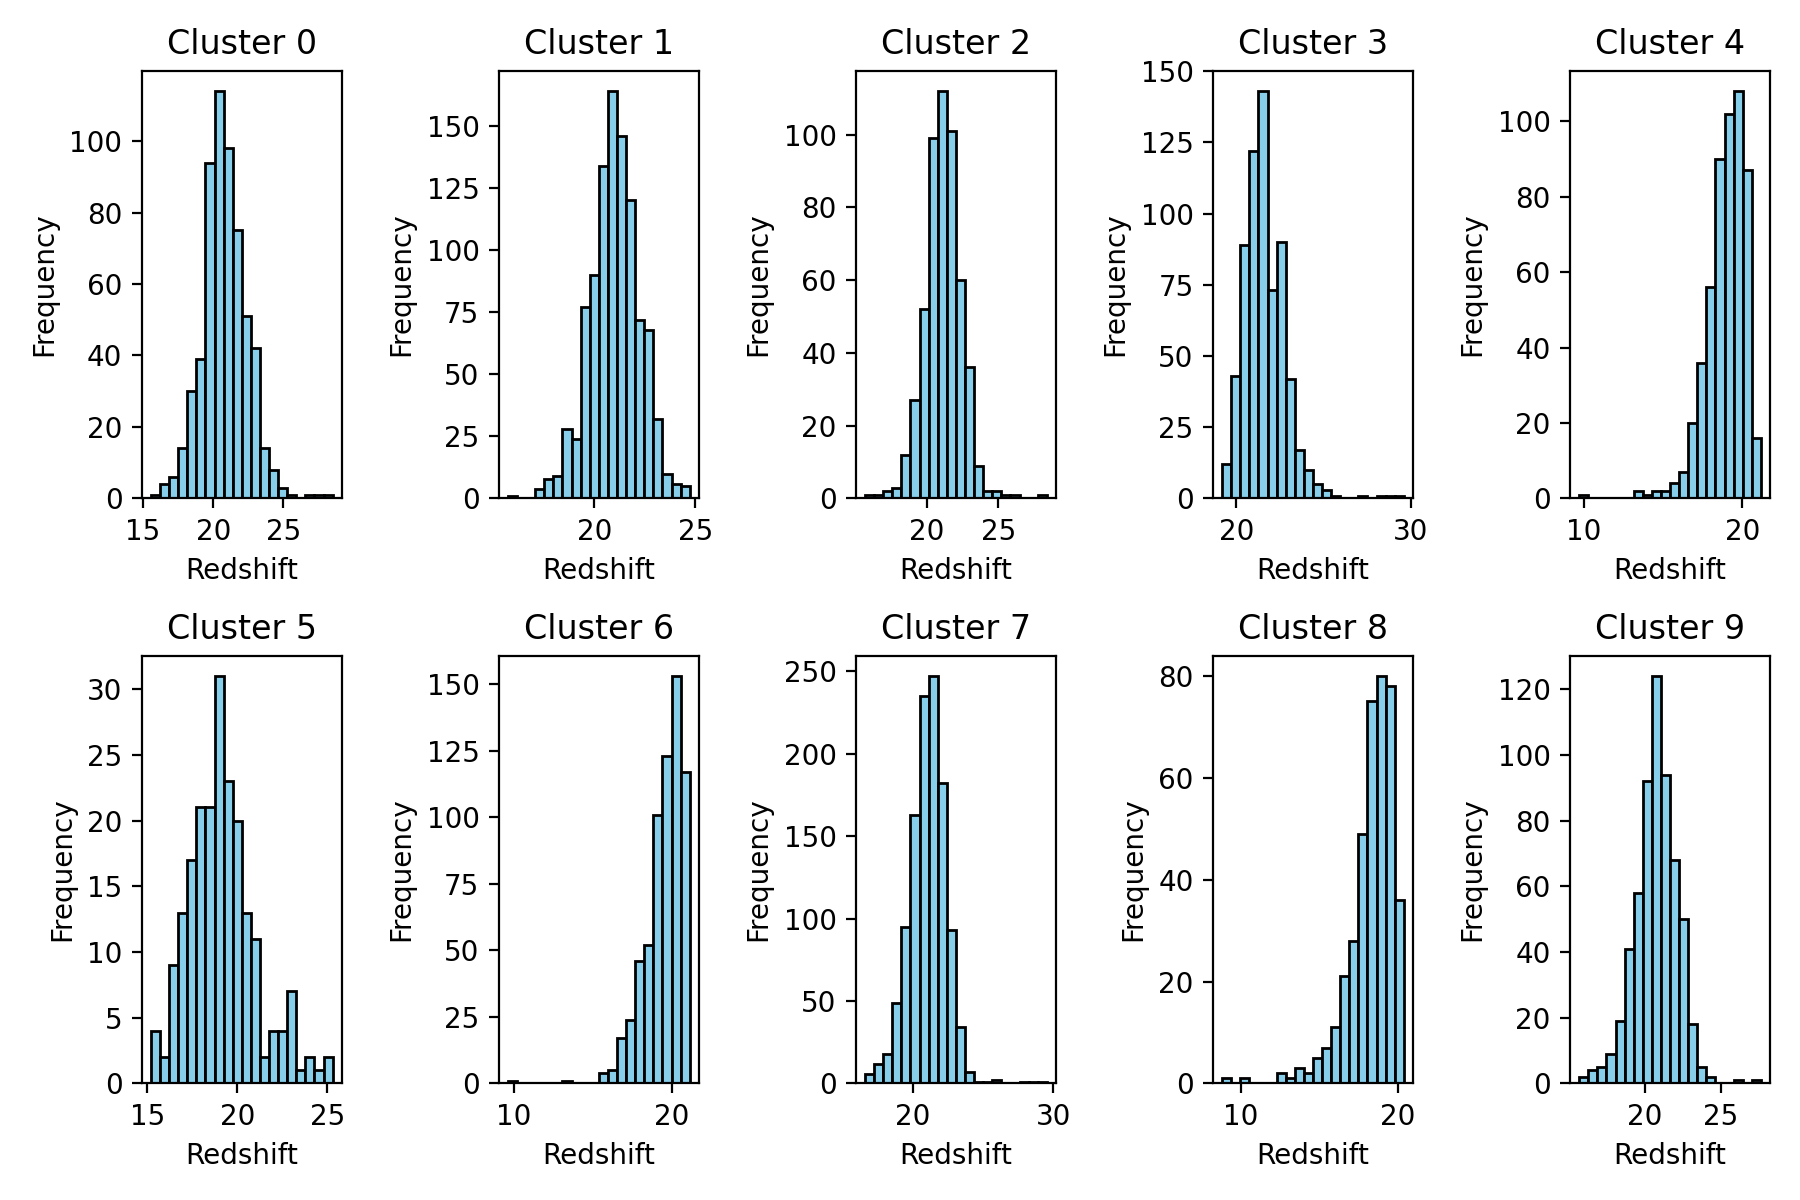

In [8]:
plt.figure(figsize=(9, 6))

for cluster_num in range(10):
    plt.subplot(2, 5, cluster_num + 1)
    plt.hist(sdssDF['z'][labels == cluster_num], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Cluster {cluster_num}')
    plt.xlabel('Redshift')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Preliminary Analysis

In [9]:
redshift_data = sdssDF['z']
ra_data = sdssDF['ra']
dec_data = sdssDF['dec']

In [10]:
mean_redshift = np.mean(redshift_data)
mode_redshift = stats.mode(redshift_data)
std_deviation = np.std(redshift_data)
skewness = stats.skew(redshift_data)

correlation_ra, _ = pearsonr(redshift_data, ra_data)
correlation_dec, _ = pearsonr(redshift_data, dec_data)

/var/folders/sj/cyrxvp_13qz06k7r19pd0d_w0000gn/T/ipykernel_26416/1380141117.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_redshift = stats.mode(redshift_data)


In [11]:
print("Original Num Galaxies:", galaxy_num)
print("Sample Size Num: ", sample_galaxy_num)

print("\nMean Redshift:", mean_redshift)
print("Mode Redshift:", mode_redshift.mode[0])
print("Standard Deviation:", std_deviation)
print("Skewness:", skewness)

print("\nCorrelation between Redshift and RA:", correlation_ra)
print("Correlation between Redshift and Dec:", correlation_dec)

Original Num Galaxies: 5000000
Sample Size Num:  50000

Mean Redshift: 20.71587380638
Mode Redshift: 22.8269
Standard Deviation: 1.6009763048152714
Skewness: -0.525584773634852

Correlation between Redshift and RA: -0.19739325108930186
Correlation between Redshift and Dec: 0.08794868009797743
